In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

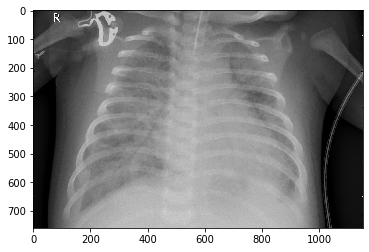

In [3]:
DATADIR = 'C:/Users/Rocio/Desktop/Pneu/chest_xray/train'

CATEGORIES = ['PNEUMONIA', 'NORMAL']

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray')  
        plt.show()  
        break  
    break  

In [4]:
def get_labeled_files(folder):
    x = []
    y = []
    
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['NORMAL']:
                label = 0
            elif folderName in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
                continue 
            for image_filename in os.listdir(folder + folderName):
                img_path = folder + folderName + '/' + image_filename
                if img_path is not None and str.endswith(img_path, 'jpeg'):
                    x.append(img_path)
                    y.append(label)
    
    x = np.asarray(x)
    y = np.asarray(y)
    return x, y

In [5]:
x, y = get_labeled_files('C:/Users/Rocio/Desktop/Pneu/chest_xray/train/')

list(zip(x, y))[:10]

[('C:/Users/Rocio/Desktop/Pneu/chest_xray/train/NORMAL/IM-0115-0001.jpeg', 0),
 ('C:/Users/Rocio/Desktop/Pneu/chest_xray/train/NORMAL/IM-0117-0001.jpeg', 0),
 ('C:/Users/Rocio/Desktop/Pneu/chest_xray/train/NORMAL/IM-0119-0001.jpeg', 0),
 ('C:/Users/Rocio/Desktop/Pneu/chest_xray/train/NORMAL/IM-0122-0001.jpeg', 0),
 ('C:/Users/Rocio/Desktop/Pneu/chest_xray/train/NORMAL/IM-0125-0001.jpeg', 0),
 ('C:/Users/Rocio/Desktop/Pneu/chest_xray/train/NORMAL/IM-0127-0001.jpeg', 0),
 ('C:/Users/Rocio/Desktop/Pneu/chest_xray/train/NORMAL/IM-0128-0001.jpeg', 0),
 ('C:/Users/Rocio/Desktop/Pneu/chest_xray/train/NORMAL/IM-0129-0001.jpeg', 0),
 ('C:/Users/Rocio/Desktop/Pneu/chest_xray/train/NORMAL/IM-0131-0001.jpeg', 0),
 ('C:/Users/Rocio/Desktop/Pneu/chest_xray/train/NORMAL/IM-0133-0001.jpeg', 0)]

In [6]:
NUM_CLASSES = 2

def input_parser(img_path, label):
    # convert the label to one-hot encoding
    one_hot = tf.one_hot(label, NUM_CLASSES)
    img_file = tf.read_file(img_path)
    img_decoded = tf.image.decode_jpeg(img_file, channels=3, name="decoded_images")
    return img_decoded, one_hot

# This function takes image and resizes it to smaller format (150x150)
def image_resize(images, labels):
    resized_image = tf.image.resize_images(images, (150, 150), align_corners=True)
    resized_image_asint = tf.cast(resized_image, tf.int32)
    return resized_image_asint, labels    

In [7]:

def build_pipeline_plan(img_paths, labels, batch_size):

    # We build a tensor of image paths and labels
    tr_data = tf.data.Dataset.from_tensor_slices((img_paths, labels))
    # First step of input pipeline - read images in paths as jpegs
    tr_data_imgs = tr_data.map(input_parser)
    # Apply resize to each image in the pipeline
    tr_data_imgs = tr_data_imgs.map(image_resize)
    # Gives us opportuinty to batch images into small groups
    tr_dataset = tr_data_imgs.batch(batch_size)
    # create TensorFlow Iterator object directly from input pipeline
    iterator = tr_dataset.make_one_shot_iterator()
    next_element = iterator.get_next()
    return next_element

# Function to execute defined pipeline in Tensorflow session
def process_pipeline(next_element):
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
    with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
       
        images = []
        labels_hot = []
        while True:
            try:
                elem = sess.run(next_element)
                images = elem[0]
                labels_hot = elem[1]
            except tf.errors.OutOfRangeError:
                print("Finished reading the dataset")
                return images, labels_hot

In [7]:
#Load the dataset

In [8]:
import tensorflow as tf

In [9]:
def load_dataset(path, batch_size):
    tf.reset_default_graph()
    files, labels = get_labeled_files(path)
    p = tf.constant(files, name="train_imgs")
    l = tf.constant(labels, name="train_labels")
    
    next_element = build_pipeline_plan(p, l, batch_size=batch_size)
    imgs, labels = process_pipeline(next_element)
    return imgs, labels

In [11]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


In [12]:
x_train, y_train = load_dataset("C:/Users/Rocio/Desktop/Pneu/chest_xray/train/", 6000)
x_test, y_test = load_dataset("C:/Users/Rocio/Desktop/Pneu/chest_xray/test/", 6000)
x_val, y_val = load_dataset("C:/Users/Rocio/Desktop/Pneu/chest_xray/val/", 6000)

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
Finished reading the dataset
Finished reading the dataset
Finished reading the dataset


In [13]:
print("Training Dataset")
print(x_train.shape)
print(y_train.shape)
print("\nTesting Dataset")
print(x_test.shape)
print(y_test.shape)
print("\n Validation  Dataset")
print(x_val.shape)
print(y_val.shape)

Training Dataset
(5216, 150, 150, 3)
(5216, 2)

Testing Dataset
(624, 150, 150, 3)
(624, 2)

 Validation  Dataset
(16, 150, 150, 3)
(16, 2)


In [ ]:
#calculate what in each Dataset.

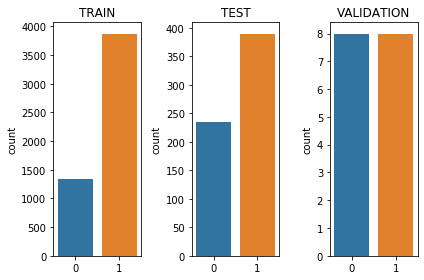

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.subplot(1,3,1)
sns.countplot(np.argmax(y_train, axis=1)).set_title('TRAIN')

plt.subplot(1,3,2)
sns.countplot(np.argmax(y_test, axis=1)).set_title('TEST')

plt.subplot(1,3,3)
sns.countplot(np.argmax(y_val, axis=1)).set_title('VALIDATION')

plt.tight_layout()

In [ ]:
#what we have before we start training.

(5216, 150, 150, 3)


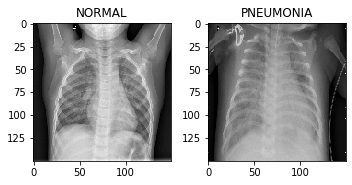

In [15]:
print(x_train.shape)

plt.figure(figsize=(5, 3))

y_train_classes = np.argmax(y_train, axis = 1)

plt.subplot(1,2,1).set_title('NORMAL')
plt.imshow(x_train[np.argmax(y_train_classes == 0)])

plt.subplot(1,2,2).set_title('PNEUMONIA')
plt.imshow(x_train[np.argmax(y_train_classes == 1)])

plt.tight_layout()

In [ ]:
# replace the orignal classification layer and build a new one

In [16]:
import keras
from keras import backend as K
from keras.models import Model
from keras.layers import Flatten, Dense, BatchNormalization, Dropout
from keras.applications.vgg16 import VGG16

from keras.applications.inception_v3 import InceptionV3

K.clear_session()

NUM_CLASSES = 2

base_model = VGG16(weights='C:/Users/Rocio/Desktop/Pneu/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(150, 150, 3))


x = base_model.output
x = Flatten()(x)
x = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________

In [ ]:
#over 14M trainable wegihts.

In [17]:
def print_layers(model):
    for idx, layer in enumerate(model.layers):
        print("layer {}: {}, trainable: {}".format(idx, layer.name, layer.trainable))

In [ ]:
#train only the most bottom classifier layers.

In [19]:
for layer in model.layers[0:18]:
    layer.trainable = False
    
print_layers(model)

layer 0: input_1, trainable: False
layer 1: block1_conv1, trainable: False
layer 2: block1_conv2, trainable: False
layer 3: block1_pool, trainable: False
layer 4: block2_conv1, trainable: False
layer 5: block2_conv2, trainable: False
layer 6: block2_pool, trainable: False
layer 7: block3_conv1, trainable: False
layer 8: block3_conv2, trainable: False
layer 9: block3_conv3, trainable: False
layer 10: block3_pool, trainable: False
layer 11: block4_conv1, trainable: False
layer 12: block4_conv2, trainable: False
layer 13: block4_conv3, trainable: False
layer 14: block4_pool, trainable: False
layer 15: block5_conv1, trainable: False
layer 16: block5_conv2, trainable: False
layer 17: block5_conv3, trainable: False
layer 18: block5_pool, trainable: True
layer 19: flatten, trainable: True
layer 20: dense, trainable: True


In [20]:
model.trainable_weights
#By locking the trainable layers we decrease ammount of trainable parameters to 16'384.

[<tf.Variable 'dense/kernel:0' shape=(8192, 2) dtype=float32>,
 <tf.Variable 'dense/bias:0' shape=(2,) dtype=float32>]

In [21]:
import numpy as np
import keras.backend as K
from itertools import product
from functools import partial

In [22]:
def w_categorical_crossentropy(y_true, y_pred, weights):
    nb_cl = len(weights)
    final_mask = K.zeros_like(y_pred[:, 0])
    y_pred_max = K.max(y_pred, axis=1)
    y_pred_max = K.reshape(y_pred_max, (K.shape(y_pred)[0], 1))
    y_pred_max_mat = K.cast(K.equal(y_pred, y_pred_max), K.floatx())
    for c_p, c_t in product(range(nb_cl), range(nb_cl)):
        final_mask += (weights[c_t, c_p] * y_pred_max_mat[:, c_p] * y_true[:, c_t])
    return K.categorical_crossentropy(y_pred, y_true) * final_mask


w_array = np.ones((2,2))
w_array[1,0] = 30 # penalizing FN
w_array[0,1] = 1 # penalizing FP

spec_loss = lambda y_true, y_pred: w_categorical_crossentropy(y_true, y_pred, weights=w_array)

In [23]:
# Create the loss function object using the wrapper function abov
optimizer = keras.optimizers.Adam(lr=0.0001)

model.compile(loss='categorical_crossentropy',     #  loss=spec_loss,
              optimizer=optimizer, 
              metrics=['accuracy'])

In [24]:
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau, EarlyStopping

# This callback saves the wieights of the model after each epoch
checkpoint = ModelCheckpoint(
    'model/weights.epoch_{epoch:02d}.hdf5',
    monitor='val_loss', 
    save_best_only=True, 
    save_weights_only=False,
    mode='auto',
    verbose=1
)

# This callback writes logs for TensorBoard
tensorboard = TensorBoard(
    log_dir='./Graph', 
    histogram_freq=0,  
    write_graph=True
)

In [ ]:
#The training set is un-balanaced. Let's calculate class weights

In [25]:
from sklearn.utils import class_weight
y_labels = np.argmax(y_train, axis=1)
classweight = class_weight.compute_class_weight('balanced', np.unique(y_labels), y_labels)
print(classweight)

[1.9448173  0.67303226]


In [26]:
# prepare a directory to store the model weights
os.makedirs('./model', exist_ok=True)

history = model.fit(
    x=x_train, y=y_train,
    class_weight=classweight,
    validation_split=0.3,
    callbacks=[tensorboard],
    shuffle=True,
    batch_size=32,
    epochs=5,
    verbose=1
)

Train on 3651 samples, validate on 1565 samples
Epoch 1/5
3651/3651 [==============================] - 1604s 439ms/sample - loss: 1.5018 - acc: 0.8381 - val_loss: 0.5929 - val_acc: 0.9201
Epoch 2/5
3651/3651 [==============================] - 1412s 387ms/sample - loss: 0.4632 - acc: 0.9356 - val_loss: 0.3603 - val_acc: 0.9450
Epoch 3/5
3651/3651 [==============================] - 1404s 385ms/sample - loss: 0.2832 - acc: 0.9575 - val_loss: 0.2540 - val_acc: 0.9585
Epoch 4/5
3651/3651 [==============================] - 1479s 405ms/sample - loss: 0.1950 - acc: 0.9671 - val_loss: 0.2965 - val_acc: 0.9495
Epoch 5/5
3651/3651 [==============================] - 1414s 387ms/sample - loss: 0.1331 - acc: 0.9721 - val_loss: 0.4402 - val_acc: 0.9304


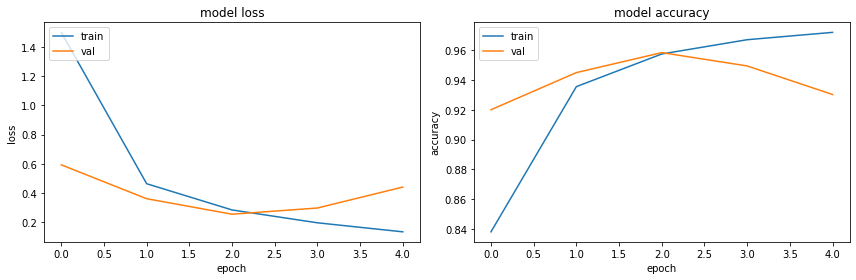

In [27]:
def plot_learning_curves(history):
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.subplot(1,2,2)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.tight_layout()
    
plot_learning_curves(history)

In [ ]:
#Measure Loss and Accuracy on the test dataset

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Model Loss: {}, Accuracy: {}'.format(score[0], score[1]))

Model Loss: 1.6706301872478575, Accuracy: 0.8044871687889099


In [ ]:
#performance with Confusion Matrix.

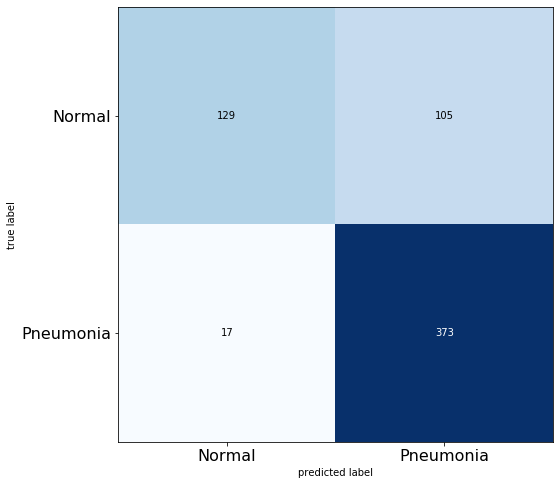

In [29]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

y_pred = model.predict(x_test)
# to get the prediction, we pick the class with with the highest probability
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true = np.argmax(y_test, axis = 1) 


conf_mtx = confusion_matrix(y_true, y_pred_classes) 
plot_confusion_matrix(conf_mtx, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [ ]:
#With ROC curve

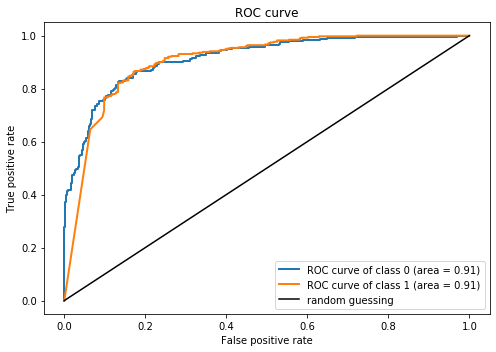

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(NUM_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
                                 
plt.figure(figsize=(7, 5))

for i in range(NUM_CLASSES):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    
plt.plot(fpr[0], fpr[0], 'k-', label = 'random guessing')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

plt.tight_layout()